# import packages

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os

# load dataset

In [18]:
data_path = os.path.join(os.getcwd(), 'quantum_spin_bit_meas.txt')
data_csv = pd.read_csv(data_path, sep='\t', header=None)
data = data_csv.iloc[1:, 0:2]

x_train, x_test, y_train, y_test = train_test_split(data[0], data[1], test_size=0.3, random_state=42)
x_train = np.array(x_train).reshape(-1, 1)
y_train = np.array(y_train).astype(np.float64)
x_test = np.array(x_test).reshape(-1, 1)
y_test = np.array(y_test).astype(np.float64)

# model

In [25]:
# Initialize the LogisticRegression model
logistic_model = LogisticRegression()

# Fit the model to the training data
logistic_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(x_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8233333333333334
Precision: 0.7959183673469388
Recall: 0.8357142857142857
F1 Score: 0.8153310104529616


# Plot

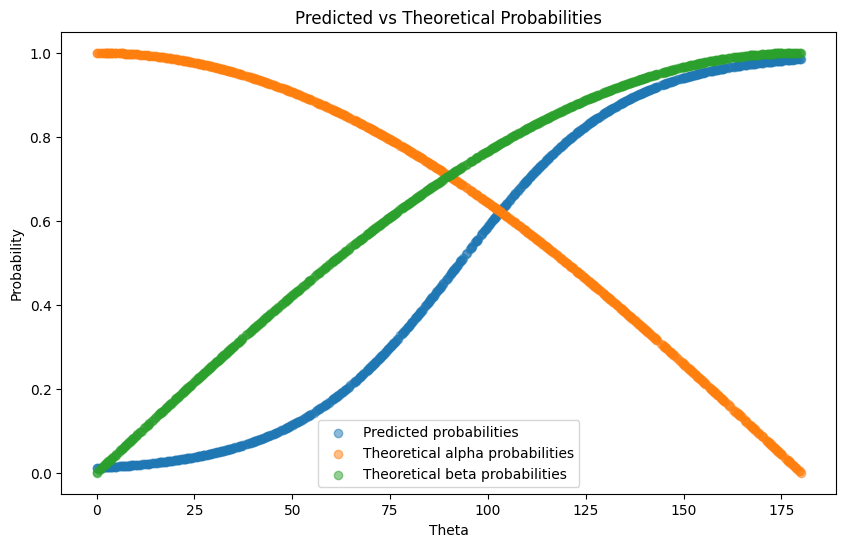

In [24]:
import matplotlib.pyplot as plt
x_train = x_train.astype(np.float64)
y_pred_probs = logistic_model.predict_proba(x_train)[:, 1]
theta = x_train / 180 * np.pi
alpha_theoretical = np.cos(theta / 2)
beta_theoretical = np.sin(theta / 2)

# Plot the predicted probabilities and the theoretical probabilities
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_pred_probs, label='Predicted probabilities', alpha=0.5)
plt.scatter(x_train, alpha_theoretical, label='Theoretical alpha probabilities', alpha=0.5)
plt.scatter(x_train, beta_theoretical, label='Theoretical beta probabilities', alpha=0.5)
plt.xlabel('Theta')
plt.ylabel('Probability')
plt.title('Predicted vs Theoretical Probabilities')
plt.legend()
plt.show()